<a href="https://colab.research.google.com/github/dianatuyen/DS-3001-project_gss/blob/main/Project_GSS_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/DS3001/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 23 (delta 6), reused 1 (delta 1), pack-reused 15
Receiving objects: 100% (23/23), 23.94 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#
var_list = ['age', 'polviews'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [4]:
df =  pd.read_csv('/content/selected_gss_data.csv') # Load dataset
df.head() # Preview dataset

,age,polviews
0,48.0,"moderate, middle of the road"
1,25.0,slightly liberal
2,42.0,slightly conservative
3,24.0,liberal
4,24.0,slightly conservative


,age,polviews
0,48.0,"moderate, middle of the road"
1,25.0,slightly liberal
2,42.0,slightly conservative
3,24.0,liberal
4,24.0,slightly conservative


In [5]:
# Define the mapping dictionary
polviews_mapping = {
    'extremely liberal': 1,
    'liberal': 2,
    'slightly liberal': 3,
    'moderate, middle of the road': 4,
    'slightly conservative': 5,
    'conservative': 6,
    'extremely conservative': 7
}

# Create the new column 'polviews_numeric' based on the mapping
df['polviews_numeric'] = df['polviews'].map(polviews_mapping)

# Display the updated DataFrame
df

,age,polviews,polviews_numeric
0,48.0,"moderate, middle of the road",4.0
1,25.0,slightly liberal,3.0
2,42.0,slightly conservative,5.0
3,24.0,liberal,2.0
4,24.0,slightly conservative,5.0
...,...,...,...
24125,22.0,extremely liberal,1.0
24126,29.0,"moderate, middle of the road",4.0
24127,32.0,slightly liberal,3.0
24128,49.0,slightly liberal,3.0


<ipython-input-27-aa365db6cbc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='polviews', y='age', palette='Set3')


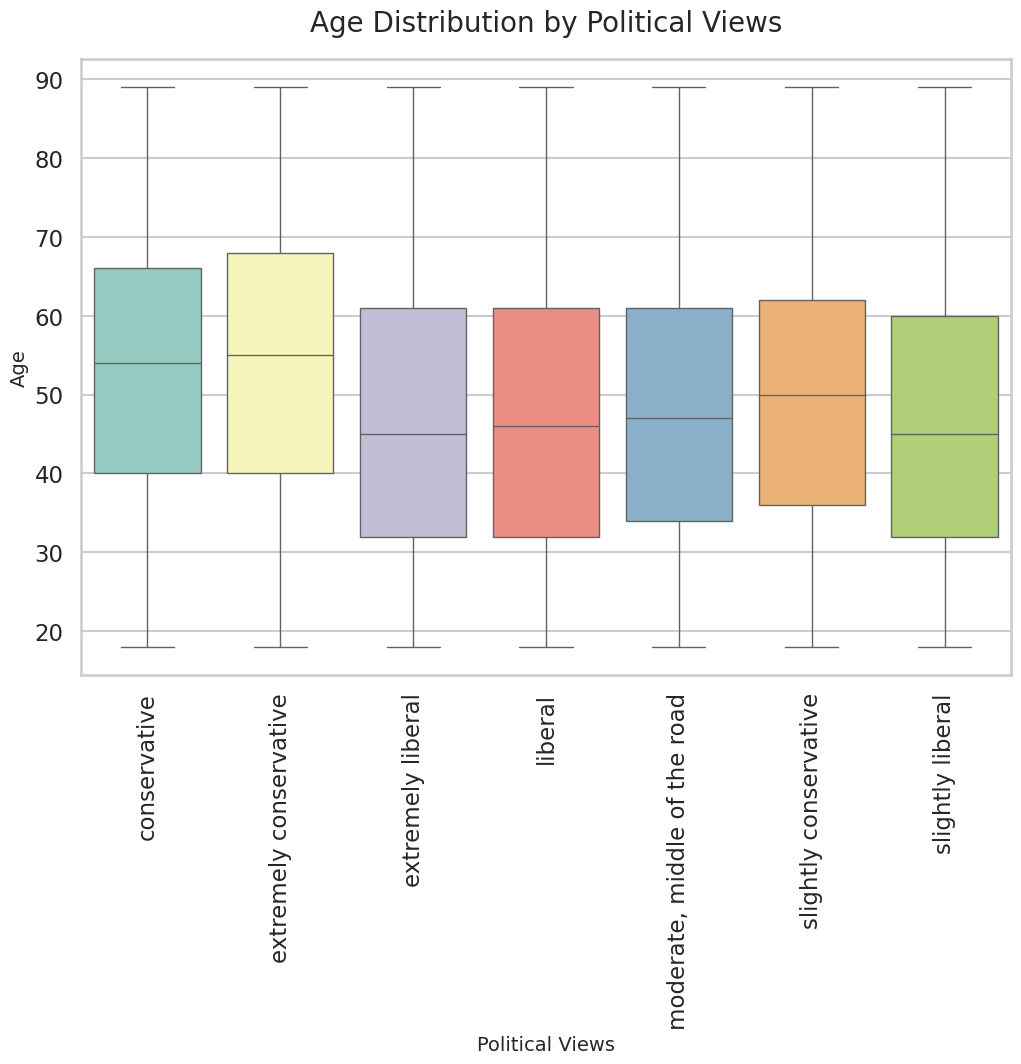

In [27]:
plt.figure(figsize=(12, 8))  # Set the figure size for better readability

sns.boxplot(data=df, x='polviews', y='age', palette='Set3')

plt.title('Age Distribution by Political Views')
plt.xlabel('Political Views')
plt.ylabel('Age')
plt.title('Age Distribution by Political Views', fontsize=20, pad=20)
plt.xlabel('Political Views', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.xticks(rotation=90)

plt.show()

